# [2022 Fall] Assignment4-3

> Course: AP3021

## 4-3-1

Develop a user-friendly subprogram for the modified false-position method based on Fig. 5.15. Test the program by determining the root of the function described in Example 5.6. Perform a number of runs until the true percent relative error falls below 0.01%. (Python)

In [1]:
def f(x) :
    ans = x ** 10 - 1

    return ans

In [2]:
def count_ea(new_x_root, old_x_root) :

    if (old_x_root == -1) : # jump out the first data.
        return 9999
    else :
        ea = abs((new_x_root - old_x_root) / new_x_root)
        ea = ea * 100   # turn into percent
    
    return ea

In [3]:
def count_et(true_value, approximation) :
    true_error = true_value - approximation
    et = abs((true_error / true_value) * 100)

    return et

In [4]:
def ModFalsePos(x_lowwer, x_upper, x_root, es, iter_max, iter_count_list, ea_list, et_list) :
    iter_count = 0
    iter_upper, iter_lowwer = 0, 0
    lowwer_value = f(x_lowwer)
    upper_value = f(x_upper)

    while True :
        last_x_root = x_root
        x_root = x_upper - upper_value * (x_lowwer - x_upper) / (lowwer_value - upper_value)
        root_value = f(x_root)

        iter_count += 1
        iter_count_list.append(iter_count)

        if (x_root != 0) :
            ea = count_ea(x_root, last_x_root)
            ea_list.append(ea)

        true_value = 1

        et = count_et(true_value, x_root)
        et_list.append(et)

        temp = lowwer_value * root_value

        if (temp < 0) :
            x_upper = x_root
            upper_value = f(x_upper)
            iter_upper = 0
            iter_lowwer += 1

            if (iter_lowwer >= 2) :
                lowwer_value /= 2
        elif (temp > 0) :
            x_lowwer = x_root
            lowwer_value = f(x_lowwer)
            iter_lowwer = 0
            iter_upper += 1

            if (iter_upper >= 2) :
                upper_value /= 2
        else :
            ea = 0.0
        
        print("count", iter_count, "ea", ea, "root", x_root)
        
        if (ea < es or iter_count >= iter_max) :
            return x_root

In [5]:
x_lowwer = 0
x_upper = 1.3
x_root = -1
true_percent_relative_error = 0.01 # 0.01%
iter_max = 500
iter_count_list = []
ea_list = []
et_list = []

x_root = ModFalsePos(x_lowwer, x_upper, x_root, true_percent_relative_error, iter_max, iter_count_list, ea_list, et_list)

print("\nthe approximate root:", x_root)

count 1 ea 9999 root 0.09429959537232735
count 2 ea 48.11829867483983 root 0.1817588725190793
count 3 ea 45.42056803211995 root 0.33301715676712107
count 4 ea 40.89596253644958 root 0.5634423147022628
count 5 ea 33.42786332211735 root 0.8463635731395354
count 6 ea 21.261925768742138 root 1.074910177068493
count 7 ea 13.687880507544154 root 0.9454923183277778
count 8 ea 3.796168994661739 root 0.9828011093189348
count 9 ea 2.120752777330274 root 1.0040954923602121
count 10 ea 0.44213894808025606 root 0.9996755374546943
count 11 ea 0.03185260045655777 root 0.9999940615677148
count 12 ea 0.0011642999121982691 root 1.0000057046332558

the approximate root: 1.0000057046332558


## 4-3-2

Plot the true and approximate percent relative errors versus number of iterations. (Python)

In [6]:
import matplotlib.pyplot as plt

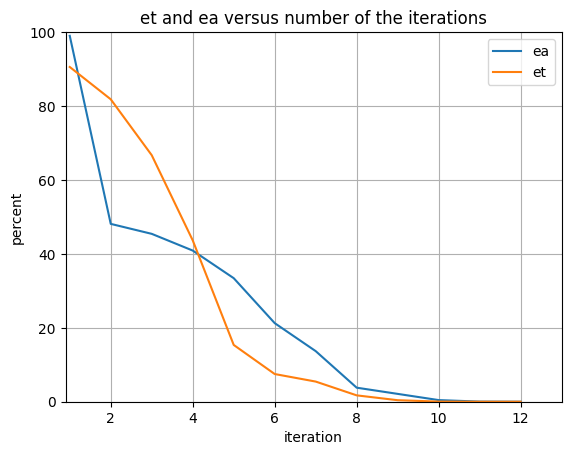

In [7]:
# plot ea and et

ea_list[0] = 99     #the first element is neglected.
x = iter_count_list
y1 = ea_list
y2 = et_list

plt.plot(x, y1)
plt.plot(x, y2)

plt.xlim(0.9, 13)
plt.ylim(0, 100)
plt.xlabel("iteration")
plt.ylabel("percent")

plt.title("et and ea versus number of the iterations")
plt.grid()
plt.legend(["ea", "et"], loc ="upper right")

plt.savefig("./src/imgs/A4_4_2.png", dpi=300)

plt.show()